In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Loading the datset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Wine Quality Classification/WineQT.csv")

# Overview of dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
# Dimension of dataset
df.shape

(1143, 13)

In [6]:
# check data types
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [7]:
# Checking for null values if present
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [8]:
# Descriptive Stats of dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [9]:
df.drop('Id', axis = 1 ,  inplace = True)

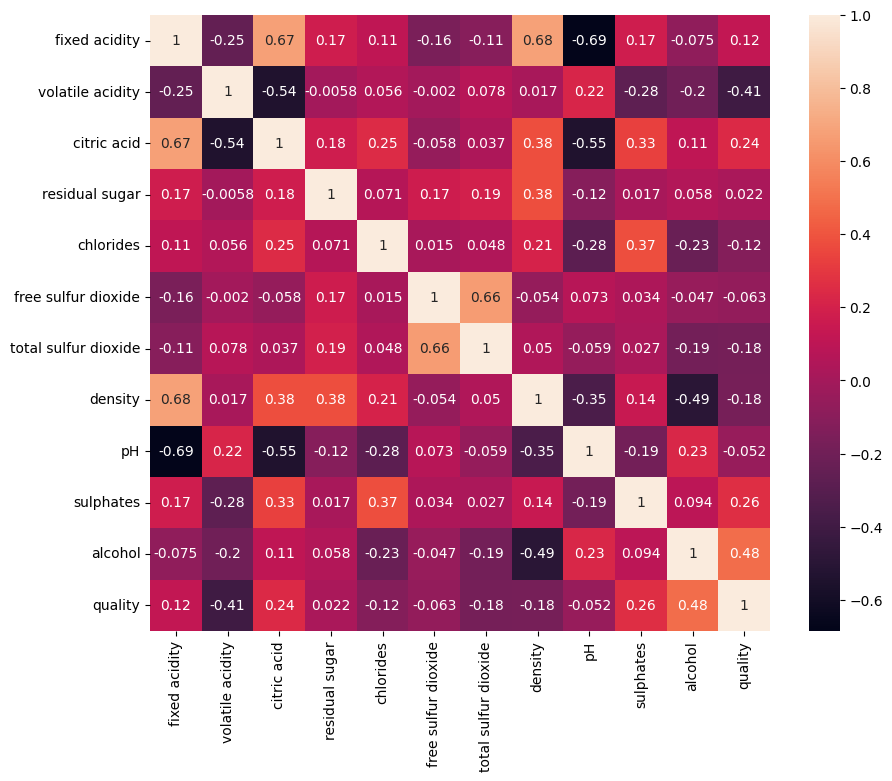

In [10]:
# Check for correlations between features in the dataset
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [11]:
scaler = MinMaxScaler()
scaler.fit(df)

MinMaxScaler()

In [12]:
transformed_data = scaler.transform(df)

In [13]:
transformed_data

array([[0.24778761, 0.39726027, 0.        , ..., 0.13772455, 0.15384615,
        0.4       ],
       [0.28318584, 0.52054795, 0.        , ..., 0.20958084, 0.21538462,
        0.4       ],
       [0.28318584, 0.43835616, 0.04      , ..., 0.19161677, 0.21538462,
        0.4       ],
       ...,
       [0.14159292, 0.32876712, 0.08      , ..., 0.1497006 , 0.32307692,
        0.4       ],
       [0.11504425, 0.29452055, 0.1       , ..., 0.25748503, 0.43076923,
        0.6       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.22754491, 0.27692308,
        0.4       ]])

In [14]:
transformed_data.shape, type(transformed_data)

((1143, 12), numpy.ndarray)

In [15]:
log_transformed_data = np.log(transformed_data + 0.0001)

In [16]:
column_names = list(df.columns)
print(len(column_names), column_names)

12 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [17]:
len(transformed_data[0])

12

## Distribution plot of original data

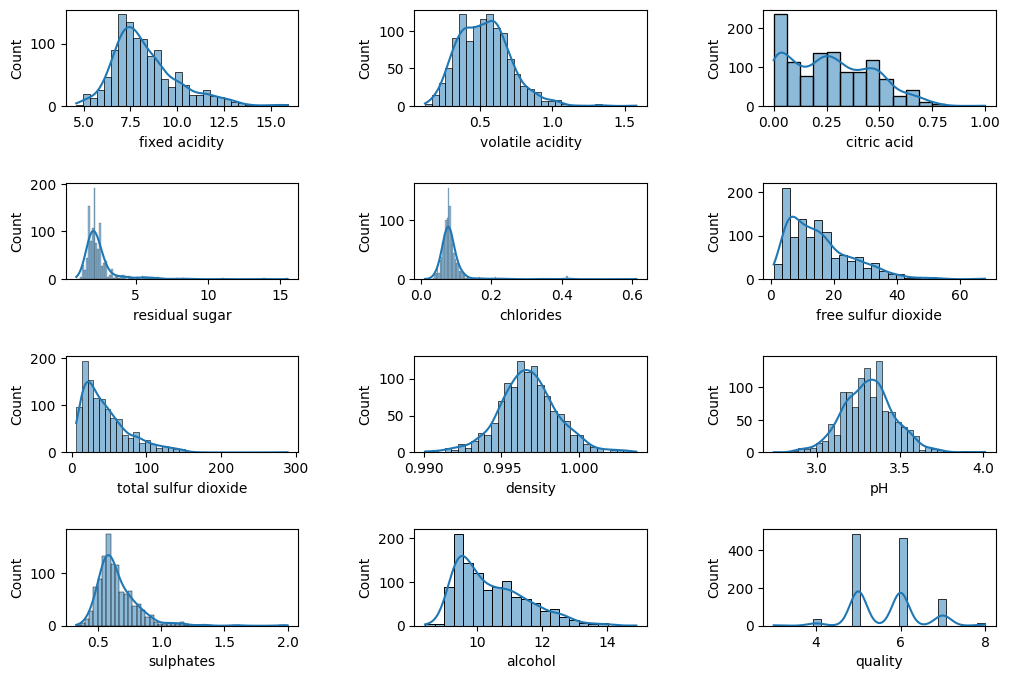

In [32]:
NUM_ROWS = 4
NUM_COLS = 3
fig, axs = plt.subplots(NUM_ROWS, NUM_COLS)
fig.set_size_inches(12, 8)
fig.subplots_adjust(wspace = 0.5, hspace = 0.8)

for row in range(NUM_ROWS):
  for col in range(NUM_COLS):
    ax = axs[row][col]
    sns.histplot(df[column_names[NUM_COLS * row + col]], ax = ax, kde = True)
    # ax.set_title(column_names[NUM_COLS * row + col])

plt.show()

## Distribution plot of min max Scaled Data

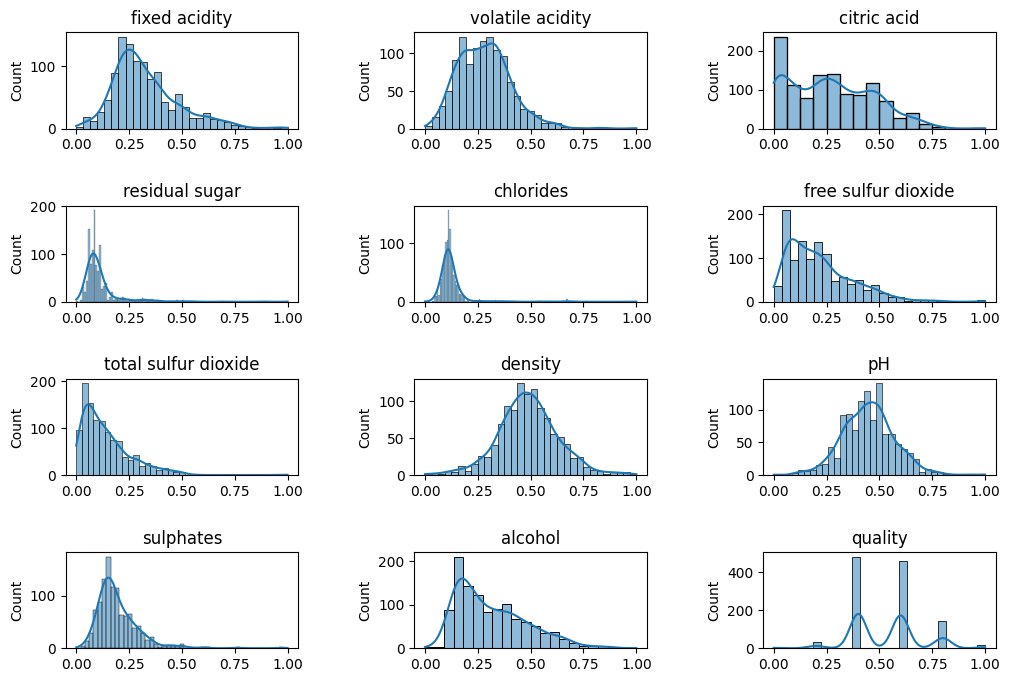

In [18]:
NUM_ROWS = 4
NUM_COLS = 3
fig, axs = plt.subplots(NUM_ROWS, NUM_COLS)
fig.set_size_inches(12, 8)
fig.subplots_adjust(wspace = 0.5, hspace = 0.8)

for row in range(NUM_ROWS):
  for col in range(NUM_COLS):
    ax = axs[row][col]
    sns.histplot(transformed_data[:, NUM_COLS * row + col], ax = ax, kde = True)
    ax.set_title(column_names[NUM_COLS * row + col])

plt.show()

## Distribution plot of log transformed data

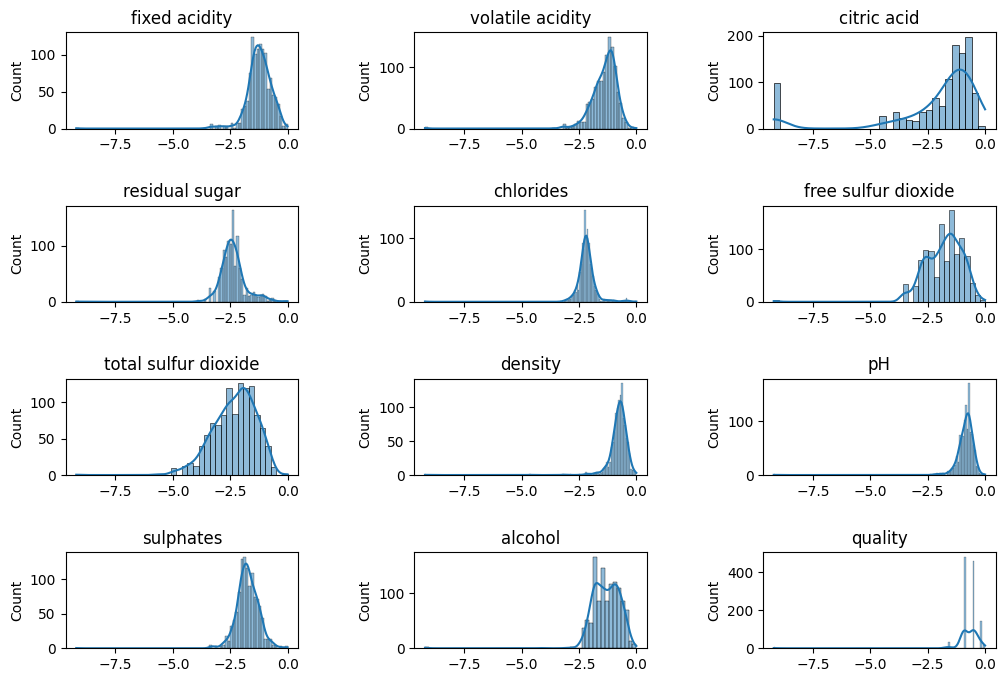

In [19]:
NUM_ROWS = 4
NUM_COLS = 3
fig, axs = plt.subplots(NUM_ROWS, NUM_COLS)
fig.set_size_inches(12, 8)
fig.subplots_adjust(wspace = 0.5, hspace = 0.8)

for row in range(NUM_ROWS):
  for col in range(NUM_COLS):
    ax = axs[row][col]
    sns.histplot(log_transformed_data[:, NUM_COLS * row + col], ax = ax, kde = True)
    ax.set_title(column_names[NUM_COLS * row + col])

plt.show()

In [20]:
transformed_data[:, NUM_COLS * row + col]

array([0.4, 0.4, 0.4, ..., 0.4, 0.6, 0.4])

## Distribution plot of boxcox transformed Data

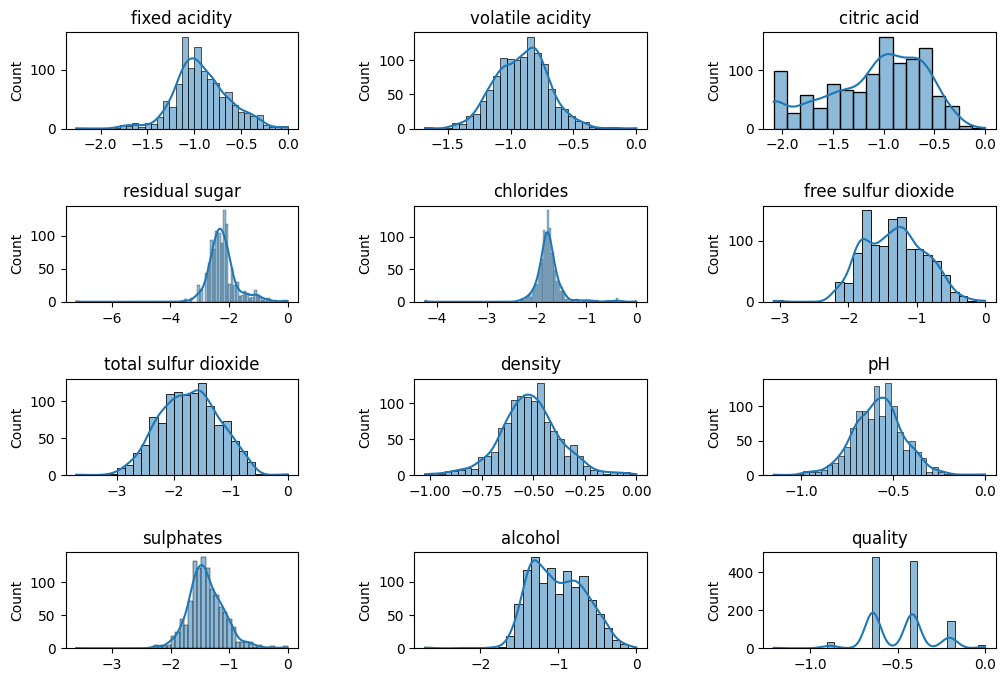

In [21]:
from scipy import stats

NUM_ROWS = 4
NUM_COLS = 3
fig, axs = plt.subplots(NUM_ROWS, NUM_COLS)
fig.set_size_inches(12, 8)
fig.subplots_adjust(wspace = 0.5, hspace = 0.8)

for row in range(NUM_ROWS):
  for col in range(NUM_COLS):
    data = transformed_data[:, NUM_COLS * row + col]
    data_bc, _ = stats.boxcox(data + 0.0001)
    
    ax = axs[row][col]
    sns.histplot(data_bc, ax = ax, kde = True)
    ax.set_title(column_names[NUM_COLS * row + col])

## Box plot of min-max scaled data

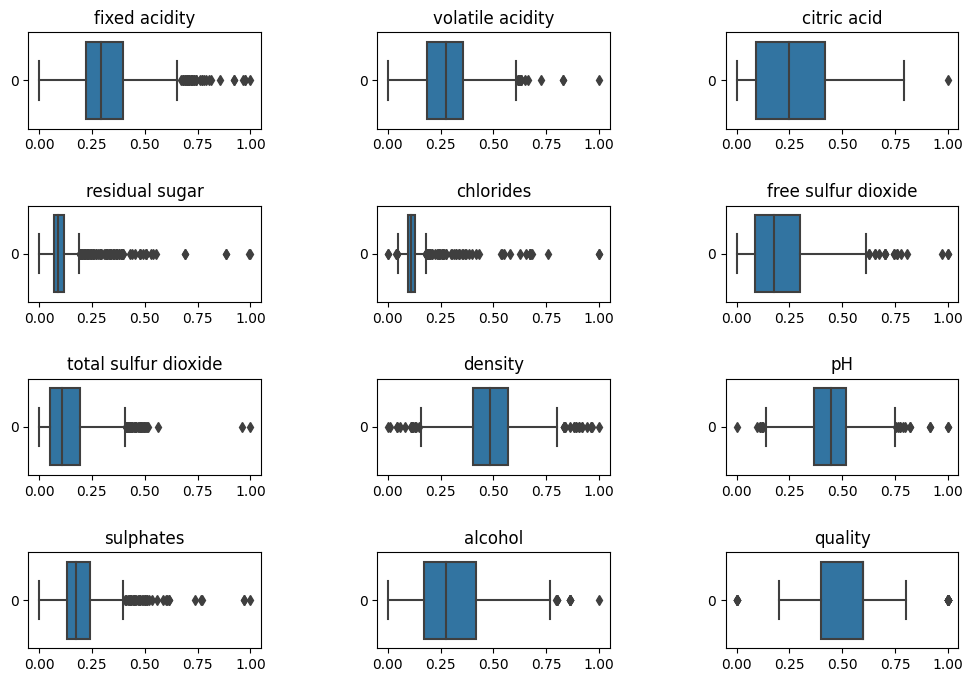

In [22]:
NUM_ROWS = 4
NUM_COLS = 3
fig, axs = plt.subplots(NUM_ROWS, NUM_COLS)
fig.set_size_inches(12, 8)
fig.subplots_adjust(wspace = 0.5, hspace = 0.8)

for row in range(NUM_ROWS):
  for col in range(NUM_COLS):
    ax = axs[row][col]
    sns.boxplot(transformed_data[:, NUM_COLS * row + col], ax = ax, orient = "h")
    ax.set_title(column_names[NUM_COLS * row + col])

plt.show()

## Box plot of log transformed data




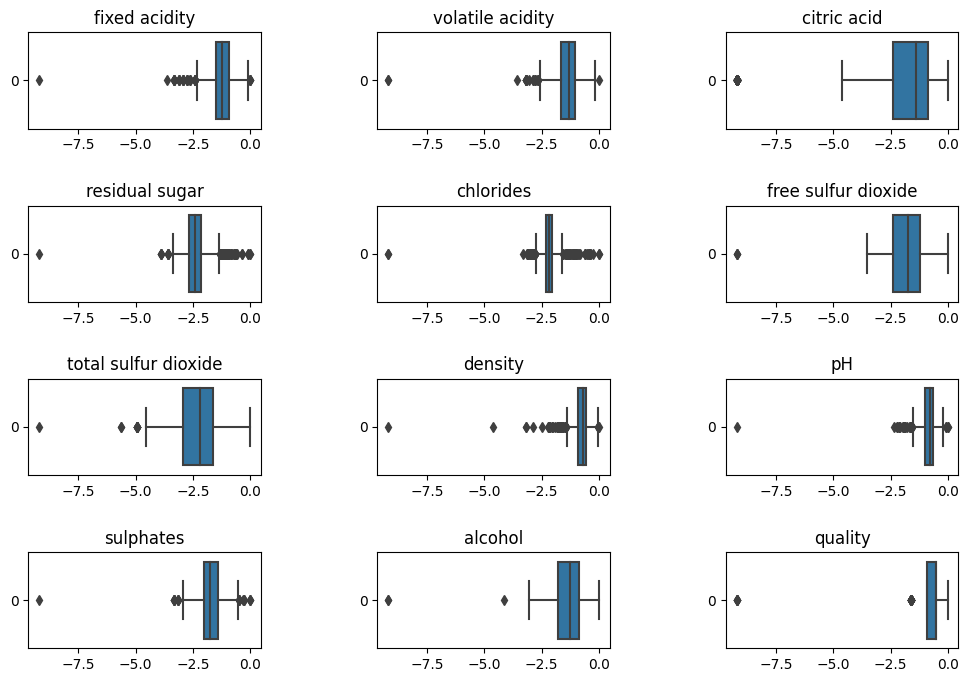

In [23]:
NUM_ROWS = 4
NUM_COLS = 3
fig, axs = plt.subplots(NUM_ROWS, NUM_COLS)
fig.set_size_inches(12, 8)
fig.subplots_adjust(wspace = 0.5, hspace = 0.8)

for row in range(NUM_ROWS):
  for col in range(NUM_COLS):
    ax = axs[row][col]
    sns.boxplot(log_transformed_data[:, NUM_COLS * row + col], ax = ax, orient = "h")
    ax.set_title(column_names[NUM_COLS * row + col])

plt.show()

## Box plot of box cox transformed data


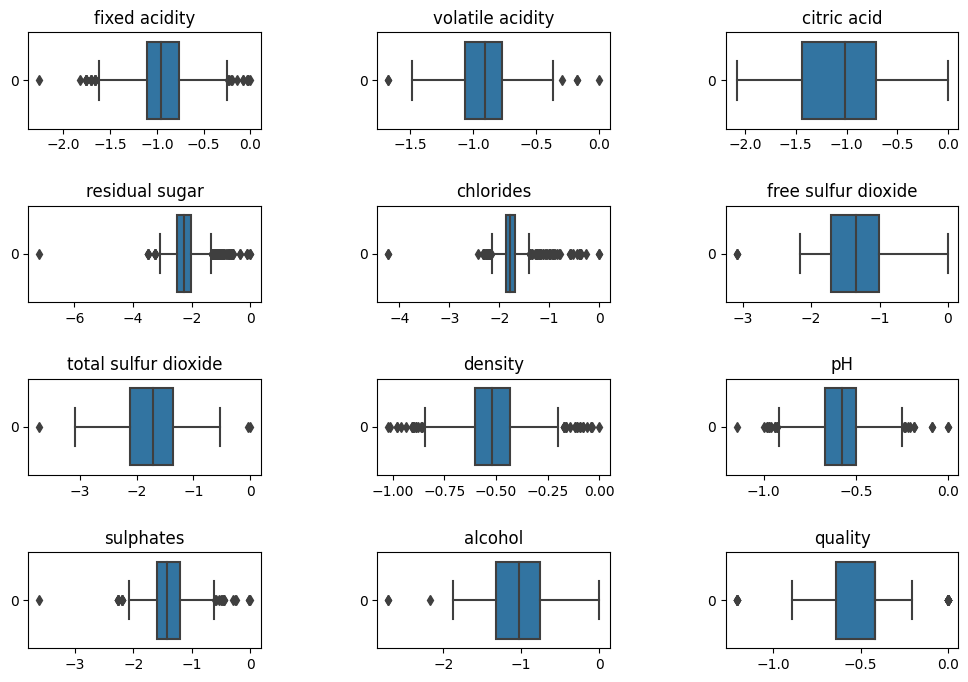

In [24]:
from scipy import stats

NUM_ROWS = 4
NUM_COLS = 3
fig, axs = plt.subplots(NUM_ROWS, NUM_COLS)
fig.set_size_inches(12, 8)
fig.subplots_adjust(wspace = 0.5, hspace = 0.8)

for row in range(NUM_ROWS):
  for col in range(NUM_COLS):
    data = transformed_data[:, NUM_COLS * row + col]
    data_bc, _ = stats.boxcox(data + 0.0001)
    
    ax = axs[row][col]
    sns.boxplot(data_bc, ax = ax, orient = "h")
    ax.set_title(column_names[NUM_COLS * row + col])

## Pairplor

In [25]:
sns.pairplot(data = df)

Output hidden; open in https://colab.research.google.com to view.